In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
%matplotlib inline
nyc=pd.read_csv("C:/Users/dishi/OneDrive/Desktop/PYTHON DATASETS/nycairbnb.csv")
nyc.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [3]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
nyc=nyc[~nyc.isna().any(axis=1)]

print('How does the average reviews_per_month differ between neighborhoods with high vs. low availability_365?')

def aval(row):
    if row['availability_365'] <= 90:
        then='low avaliability'
    elif row['availability_365'] > 90 and row['availability_365'] <= 270:
        then='medium avaliability'
    else:
        then='high avaliability'
    return then

nyc['Avaliability']=nyc.apply( aval, axis=1) # applying the custom function to the rows of the dataset
nyc.rename( mapper={'neighbourhood_group':'area'}, axis=1, inplace=True)
nyc.head(1)

g1=nyc.groupby('neighbourhood').agg({'availability_365':'mean', 
                                   'reviews_per_month':'mean'})
g1.reset_index( inplace=True)
g1.columns=['Area','availability_365','Average reviews per month']

g1['Category']=g1.apply(aval, axis=1) # we apply the availability function to the grouping of mean availability by area
g1['Category']=g1['Category'].str.title()
g1.head(2)

How does the average reviews_per_month differ between neighborhoods with high vs. low availability_365?


,Area,availability_365,Average reviews per month,Category
0,Allerton,171.378378,1.834054,Medium Avaliability
1,Arden Heights,94.250000,1.040000,Medium Avaliability


In [5]:
g1.drop(labels='availability_365', axis=1, inplace=True)

In [6]:
g1['Average reviews per month']=g1['Average reviews per month'].round(decimals=5)
g1['Category']=g1['Category'].astype('category')
g1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Area                       218 non-null    object  
 1   Average reviews per month  218 non-null    float64 
 2   Category                   218 non-null    category
dtypes: category(1), float64(1), object(1)
memory usage: 3.9+ KB


<Axes: xlabel='Category', ylabel='Average reviews per month'>

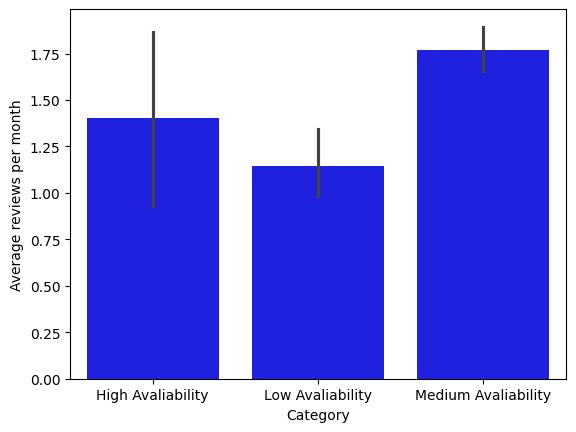

In [7]:
sns.barplot( data=g1, x='Category', y='Average reviews per month', color='blue', estimator='mean')

In [8]:
g2=nyc.groupby('availability_365').agg({'reviews_per_month':'mean'})
g2.reset_index(inplace=True)
g2=g2.loc[1:,:]
g2.head()

,availability_365,reviews_per_month
1,1,1.453079
2,2,1.528958
3,3,1.391079
4,4,1.384450
5,5,1.379897


<Axes: title={'center': 'Avaliability vs Monthly reviews'}, xlabel='availability_365'>

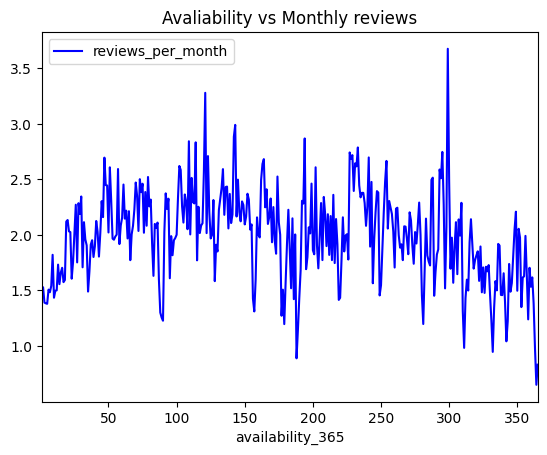

In [9]:
g2.plot( x='availability_365', y='reviews_per_month', color='blue', lw=1.5, xlim=(1,365), title='Avaliability vs Monthly reviews')

In [10]:
nyc.head(1)

,id,name,host_id,host_name,area,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Avaliability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,high avaliability


In [11]:
cats=nyc['area'].str.cat( nyc['neighbourhood'], sep=' and ')
nyc['cats']=cats
nyc.head(1)

nyc=nyc.drop(labels=['cats'], axis=1)

In [12]:
nyc.head(1)

,id,name,host_id,host_name,area,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Avaliability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,high avaliability


In [13]:
print('Are hosts with recent reviews more likely to have higher availability?')
splits=nyc['last_review'].str.split(pat='-', expand=True)
splits.head()
nyc[['year','month','day']]=splits
nyc.head(1)

Are hosts with recent reviews more likely to have higher availability?


,id,name,host_id,host_name,area,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Avaliability,year,month,day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,high avaliability,2018,10,19


In [14]:
def avaliable(data, v1, **kwargs):
    normalize=kwargs.get('normalize', False)
    if normalize:
        return data['Avaliability'].value_counts(normalize=True).get(v1,0)
    else:
        return data['Avaliability'].value_counts().get(v1,0) 

In [15]:
agg5=pd.DataFrame(
    nyc.groupby(['year','month']).apply(avaliable, 'high avaliability', normalize=True)) 
agg5.reset_index(inplace=True)
agg5.columns=['Year','Month','% high avaliability']
agg5=agg5.sort_values( by=['Year','Month'], ascending=[True, True])
agg5.tail()

C:\Users\dishi\AppData\Local\Temp\ipykernel_25552\1065754683.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nyc.groupby(['year','month']).apply(avaliable, 'high avaliability', normalize=True))


,Year,Month,% high avaliability
87,2019,03,0.223171
88,2019,04,0.225275
89,2019,05,0.286526
90,2019,06,0.257163
91,2019,07,0.229140


In [16]:
tog=agg5['Year'].str.cat(agg5['Month'], sep='/')
agg5['date']=tog
agg5['date'].nunique() # cannot plot this ahaha too many unique data points

92

In [17]:
agg5['Year']=agg5['Year'].astype('category')
agg5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year                 92 non-null     category
 1   Month                92 non-null     object  
 2   % high avaliability  92 non-null     float64 
 3   date                 92 non-null     object  
dtypes: category(1), float64(1), object(2)
memory usage: 2.7+ KB


Since the Year represents the year of the last review of a property, there is no evidence that suggests higher avaliability with more recent reviews


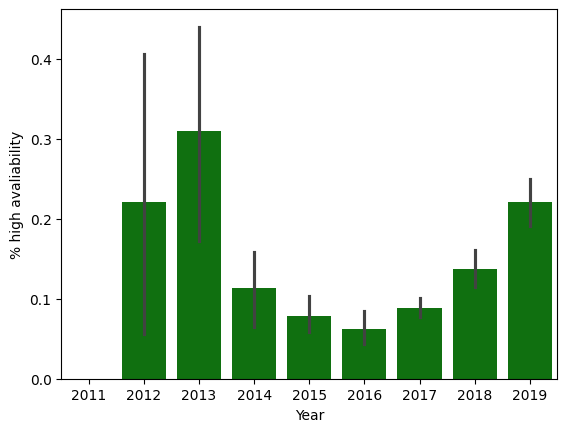

In [18]:
p1=sns.barplot( data=agg5, x='Year', y='% high avaliability', estimator='mean', color='green')
print('Since the Year represents the year of the last review of a property, there is no evidence that suggests higher avaliability with more recent reviews')

In [19]:
renames={'calculated_host_listings_count':'num of listings'}
nyc=nyc.rename(mapper=renames, axis=1)
nyc.head(1)

print('If a host has more listings, do they charge a higher price than single property hosts?')

def listings(row):
    if row['num of listings']==1:
        out='single property host'
    elif (row['num of listings']>1) and row['num of listings'] <= 10:
        out='multiple properties host'
    else:
        out='superhost'
    return out

nyc['host category']=nyc.apply(listings, axis=1) # applying the custom function to loop through the rows of the dataset
nyc.head(1)

If a host has more listings, do they charge a higher price than single property hosts?


,id,name,host_id,host_name,area,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,num of listings,availability_365,Avaliability,year,month,day,host category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,2018-10-19,0.21,6,365,high avaliability,2018,10,19,multiple properties host


In [20]:
gr=nyc.groupby('host category').agg({'price':'mean'})
gr.reset_index(inplace=True)
gr=gr.sort_values(by='price', ascending=False)
print(gr)
print('According to the table, single property hosts may charge even more than multiple property hosts, therefore no exact relationship')
print('Superhosts charge even more of course')

              host category       price
2                 superhost  196.412528
1      single property host  150.332123
0  multiple properties host  116.853094
According to the table, single property hosts may charge even more than multiple property hosts, therefore no exact relationship
Superhosts charge even more of course


In [21]:
samp=nyc.loc[:,['price','num of listings']]
print(samp.corr())
print('There seems to be almost no correlation between the price and the number of lisitngs per host')

                    price  num of listings
price            1.000000         0.052895
num of listings  0.052895         1.000000
There seems to be almost no correlation between the price and the number of lisitngs per host


In [22]:
gr1=nyc.groupby(['host category','room_type']).agg({'price':'mean'})
gr1.reset_index(inplace=True)
print('Results change according to the type of property listed')
gr1=gr1.sort_values(by='price', ascending=False)
gr1

Results change according to the type of property listed


,host category,room_type,price
6,superhost,Entire home/apt,238.574523
0,multiple properties host,Entire home/apt,200.652812
3,single property host,Entire home/apt,192.135994
7,superhost,Private room,127.104693
4,single property host,Private room,84.612168
5,single property host,Shared room,84.028369
1,multiple properties host,Private room,80.018582
2,multiple properties host,Shared room,54.942000
8,superhost,Shared room,36.125000


Text(0.5, 1.0, 'Distribution of the number of listings')

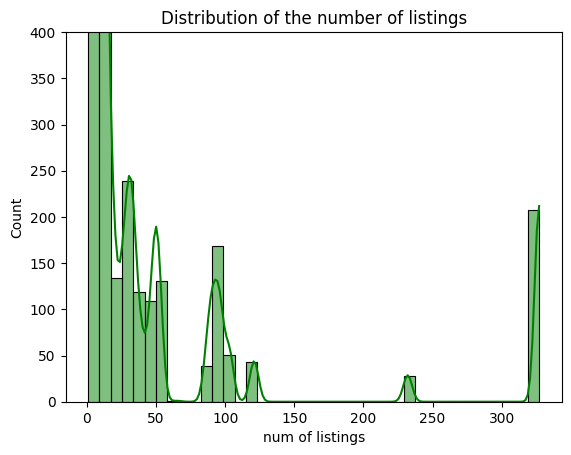

In [23]:
p1=sns.histplot(nyc['num of listings'], color='green', kde=True, bins=40)
p1.set_ylim([0,400])
p1.set_title('Distribution of the number of listings')

In [24]:
nyc['num of listings'].describe()

count    38821.000000
mean         5.166611
std         26.302954
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: num of listings, dtype: float64